In [1]:
%%capture
!conda install pandas numpy matplotlib seaborn -y

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [3]:
excluded_columns = ['wave', 'd_d_age', 'd_importance_same_race', 'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',\
                   'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o', \
                    'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important', \
                    'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', \
                   'd_shared_interests_important', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', \
                   'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', \
                    'd_shared_interests_partner', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', \
                    'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', \
                   'd_interests_correlate', 'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', \
                   'd_expected_num_matches', 'd_like', 'd_guess_prob_liked', 'field', 'decision', 'decision_o']
numeric_conv_cols = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',\
                    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', \
                    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', \
                    'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', \
                    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', \
                     'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', \
                     'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', \
                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', \
                    'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'gender']

df_res = pd.read_csv("speeddating.csv", low_memory=False)

# drop undesired columns
df_res = df_res.drop(excluded_columns, axis=1)

# replace undesired values
df_res = df_res.replace({'?':np.nan})

# include gender
df_res.gender = df_res.gender.replace({'female':1, 'male':0})

# format specific columns to numbers
for col in numeric_conv_cols:
    df_res[col] = pd.to_numeric(df_res[col])

df_res.head()

,has_null,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,0,1,21.0,27.0,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
1,0,1,21.0,22.0,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
2,1,1,21.0,22.0,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2.0,4.0,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1
3,0,1,21.0,23.0,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1
4,0,1,21.0,24.0,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2.0,4.0,...,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1


In [4]:
', '.join(df_res.columns.tolist())

'has_null, gender, age, age_o, d_age, race, race_o, samerace, importance_same_race, importance_same_religion, pref_o_attractive, pref_o_sincere, pref_o_intelligence, pref_o_funny, pref_o_ambitious, pref_o_shared_interests, attractive_o, sinsere_o, intelligence_o, funny_o, ambitous_o, shared_interests_o, attractive_important, sincere_important, intellicence_important, funny_important, ambtition_important, shared_interests_important, attractive, sincere, intelligence, funny, ambition, attractive_partner, sincere_partner, intelligence_partner, funny_partner, ambition_partner, shared_interests_partner, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, interests_correlate, expected_happy_with_sd_people, expected_num_interested_in_me, expected_num_matches, like, guess_prob_liked, met, match'

[Text(0, 0, 'NO'), Text(0, 0, 'YES')]

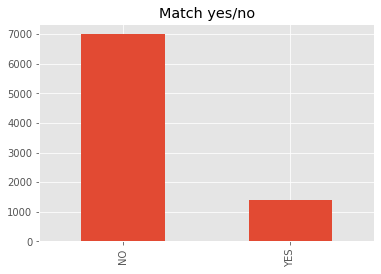

In [5]:
ax = df_res.match.value_counts().plot(kind='bar', title='Match yes/no')
ax.set_xticklabels(["NO", "YES"])

Text(0.5, 1, 'Feature correlation')

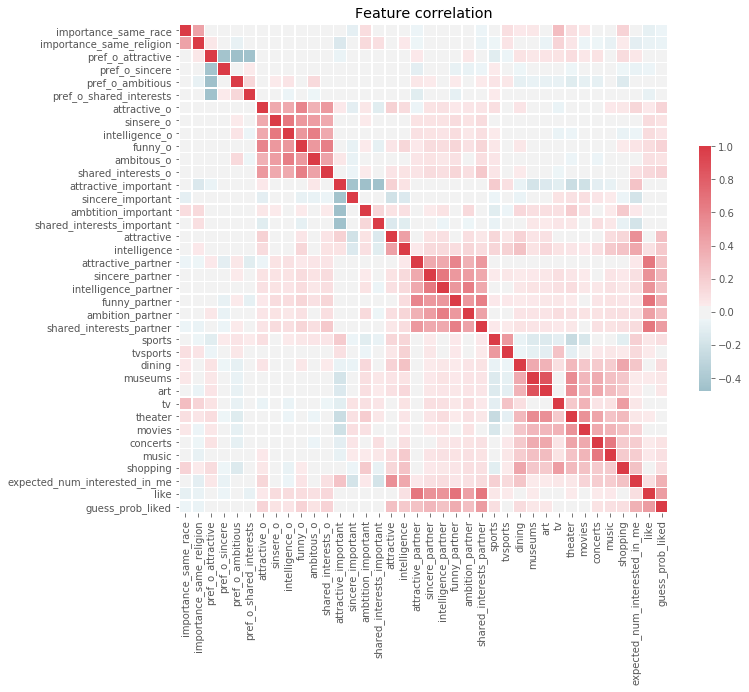

In [6]:
corr_th = 0.4
df_corr = df_res.corr()
np.fill_diagonal(df_corr.values, 0)
df_corr_red = df_corr.iloc[:, (df_corr.abs().max()>corr_th).values][df_corr.abs().max()>corr_th]
np.fill_diagonal(df_corr_red.values, 1)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr_red, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr_red, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Feature correlation')

In [7]:
df_corr_red

,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,...,art,tv,theater,movies,concerts,music,shopping,expected_num_interested_in_me,like,guess_prob_liked
importance_same_race,1.000000,0.430284,0.015809,-0.009304,-0.014219,0.013069,-0.015318,-0.010560,-0.027323,-0.004513,...,0.016580,0.285709,0.103697,0.056329,0.006641,-0.031221,0.166566,-0.020693,-0.079486,-0.045972
importance_same_religion,0.430284,1.000000,0.062631,-0.008723,-0.072276,-0.018574,-0.029962,-0.021060,-0.027599,-0.022251,...,-0.056413,0.163645,0.066919,-0.045647,-0.038964,-0.075679,0.047621,-0.098260,-0.066149,-0.056413
pref_o_attractive,0.015809,0.062631,1.000000,-0.439447,-0.475981,-0.453623,0.022952,0.011568,-0.010081,0.032327,...,0.076666,0.079610,0.117127,0.059948,0.079971,0.028541,0.120687,0.064495,0.028493,-0.003474
pref_o_sincere,-0.009304,-0.008723,-0.439447,1.000000,0.005628,0.037845,0.013344,0.003162,0.031220,0.012070,...,-0.034454,-0.036613,-0.041600,-0.026538,-0.029284,-0.004548,-0.042175,-0.062642,-0.052235,-0.017297
pref_o_ambitious,-0.014219,-0.072276,-0.475981,0.005628,1.000000,0.145760,-0.030415,0.045045,0.077382,0.022640,...,-0.070122,-0.073518,-0.122950,-0.080881,-0.083011,-0.027706,-0.128761,0.013423,0.035624,0.035272
pref_o_shared_interests,0.013069,-0.018574,-0.453623,0.037845,0.145760,1.000000,-0.016392,-0.036344,-0.044752,-0.032040,...,-0.004600,-0.028714,-0.025371,-0.009044,-0.029857,0.002079,-0.035112,-0.037024,-0.072521,-0.018714
attractive_o,-0.015318,-0.029962,0.022952,0.013344,-0.030415,-0.016392,1.000000,0.399632,0.390744,0.586334,...,0.018011,-0.059837,-0.005456,-0.020204,-0.000061,0.052242,0.059060,0.143983,0.049924,0.160793
sinsere_o,-0.010560,-0.021060,0.011568,0.003162,0.045045,-0.036344,0.399632,1.000000,0.657548,0.491453,...,0.017155,-0.020823,0.000710,-0.004637,0.009444,0.023465,-0.006888,-0.002304,0.119612,0.088097
intelligence_o,-0.027323,-0.027599,-0.010081,0.031220,0.077382,-0.044752,0.390744,0.657548,1.000000,0.494097,...,-0.005453,-0.056449,-0.044096,-0.026176,-0.026117,-0.015495,-0.062093,-0.048331,0.122633,0.074843
funny_o,-0.004513,-0.022251,0.032327,0.012070,0.022640,-0.032040,0.586334,0.491453,0.494097,1.000000,...,0.016771,-0.033670,0.000353,-0.022713,-0.017079,0.033943,0.040445,0.075027,0.117589,0.167388


[Text(0, 0, 'FEMALE'), Text(0, 0, 'MALE')]

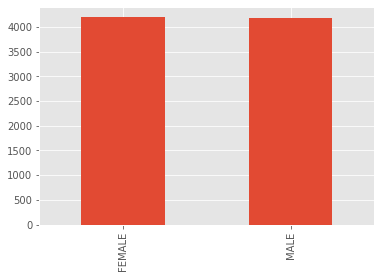

In [8]:
ax = df_res.gender.value_counts().plot(kind='bar')
ax.set_xticklabels(["FEMALE", "MALE"])

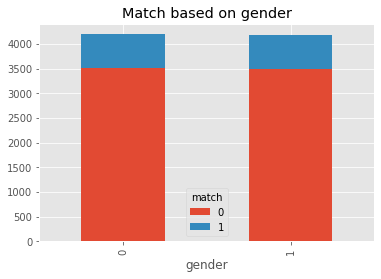

In [9]:
df_res.groupby(['gender', 'match'])['match'].count().unstack().fillna(0).plot(kind='bar', stacked=True, title="Match based on gender")

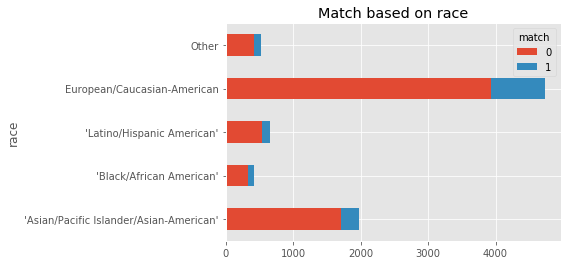

In [10]:
df_res.groupby(['race', 'match'])['match'].count().unstack().fillna(0).plot(kind='barh', stacked=True, title="Match based on race")

(0, 11)

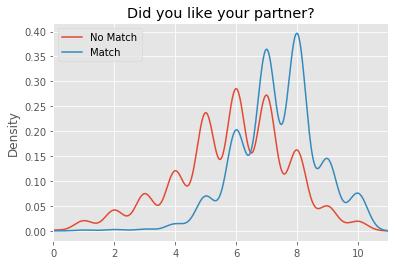

In [11]:
ax = df_res[df_res.match==0]['like'].plot(kind='kde', title='Did you like your partner?')
df_res[df_res.match==1]['like'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

(0, 11)

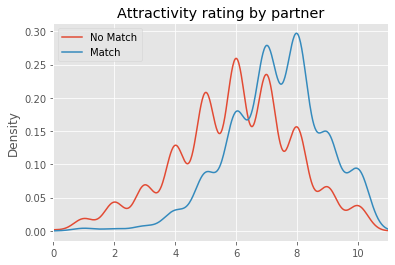

In [12]:
ax = df_res[df_res.match==0]['attractive_o'].plot(kind='kde', title='Attractivity rating by partner')
df_res[df_res.match==1]['attractive_o'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

(0, 11)

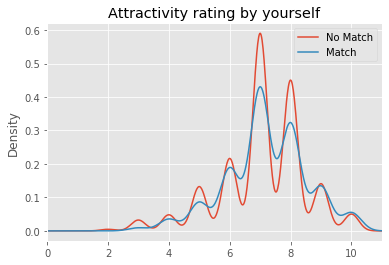

In [13]:
ax = df_res[df_res.match==0]['attractive'].plot(kind='kde', title='Attractivity rating by yourself')
df_res[df_res.match==1]['attractive'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

In [14]:
df_res.to_csv('speeddating_reduced.csv', index=False)

## AutoML to find best Model

In [15]:
%%capture
!conda install gxx_linux-64 gcc_linux-64 swig -y
!pip install auto-sklearn scikit-learn

In [16]:
import autosklearn.classification
import autosklearn.metrics
import sklearn.model_selection
import sklearn.metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [17]:
X = df_res[numeric_conv_cols]
y = df_res['match']
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [18]:
for idx, (train_index, test_index) in enumerate(kf.split(X)):
    model_fn = 'model_run_{:d}.joblib'.format(idx)
    if os.path.exists(model_fn):
        continue
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    automl = autosklearn.classification.AutoSklearnClassifier(n_jobs=-1, time_left_for_this_task=10*60, seed=123)
    automl.fit(X_train, y_train, metric=autosklearn.metrics.balanced_accuracy)

    print(automl.sprint_statistics())

    dump(automl, model_fn)

In [19]:
from sklearn.tree import DecisionTreeClassifier

for idx, (train_index, test_index) in enumerate(kf.split(X)):
    model_fn = 'bad_model_run_{:d}.joblib'.format(idx)
    if os.path.exists(model_fn):
        continue
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    bad_model = DecisionTreeClassifier(random_state=123)
    bad_model.fit(X_train.fillna(-1), y_train)
    
    y_hat = bad_model.predict(X_test.fillna(-1))
    print("Accuracy score", sklearn.metrics.balanced_accuracy_score(y_test, y_hat))

    dump(bad_model, model_fn)

#### Bad AutoML

In [20]:
for idx, (train_index, test_index) in enumerate(kf.split(X)):
    model_fn = 'bad_auto_model_run_{:d}.joblib'.format(idx)
    if os.path.exists(model_fn):
        continue
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, seed=123,
                                                              per_run_time_limit=60,
                                                              initial_configurations_via_metalearning=0,
                                                              ensemble_size=2,
                                                              include_preprocessors=["no_preprocessing", ],
                                                              n_jobs=-1)
    automl.fit(X_train, y_train, metric=autosklearn.metrics.balanced_accuracy)

    print(automl.sprint_statistics())

    dump(automl, model_fn)

auto-sklearn results:
  Dataset name: f11dacae6fd1697daf640be4bd7d5958
  Metric: balanced_accuracy
  Best validation score: 0.651579
  Number of target algorithm runs: 6
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0

auto-sklearn results:
  Dataset name: 529aaba1c7439ae585a0e67c8b7af22a
  Metric: balanced_accuracy
  Best validation score: 0.652715
  Number of target algorithm runs: 6
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0

auto-sklearn results:
  Dataset name: 2626eb47b68625dbbf6fd9bb0bbbcd68
  Metric: balanced_accuracy
  Best validation score: 0.614637
  Number of target algorithm runs: 6
  Number of successful target algorithm runs: 2
  